###  fbprophet


1. Колонки ваши должны называться ds y, где  ds - date, y - ЗП(Таргет)
2. Модель может прогнозировать только один временной ряд, если хотите прогнозировать группу, то нужно сделать через groupby

In [18]:
import pandas as pd
from fbprophet import Prophet
import numpy as np


In [19]:
df = pd.read_csv("stock forecasting/train.csv")

In [23]:
print(df['store'].nunique())
print(df['item'].nunique())


10
50


In [27]:
df_mini = df[df['store']==1]
df_mini = df_mini[df_mini['item']==1]

In [28]:
df_mini.drop(['store','item'],axis=1,inplace=True)

In [30]:
df_mini.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [31]:
df_mini.columns = ['ds','y']

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


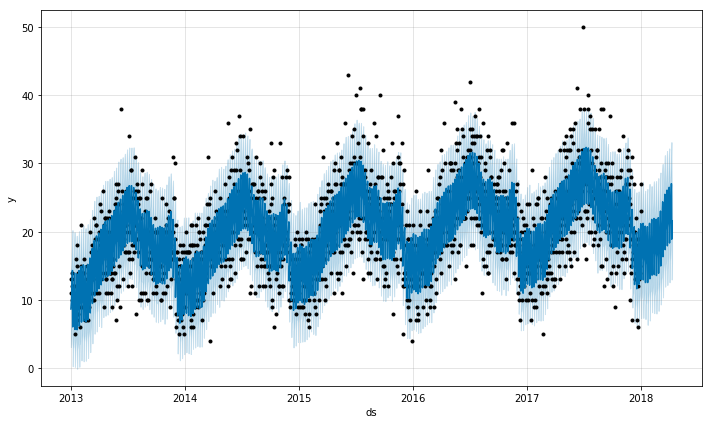

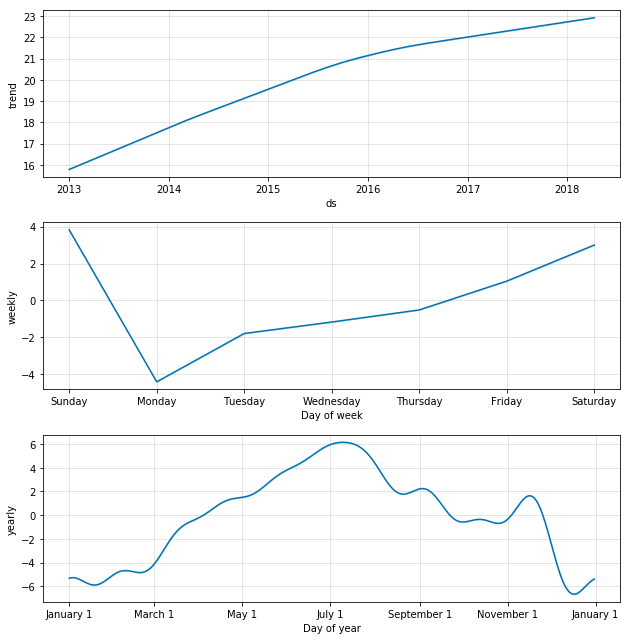

In [32]:
m = Prophet()
m.fit(df_mini)
future = m.make_future_dataframe(periods=100) #  прогнозный ряд

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)